In [242]:
import os
import numpy as np
import codecs
import re
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/carlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load data
Data source: https://www.kaggle.com/datasets/deepak711/4-subject-data-text-classification

In [195]:
#paths
predir = 'Physics_Biology_Geography_Accounts subject training data for text classification/train_data_final/' 
dirs = [('Computer_Science/Computer_Science/','csc'),('History/','his'),('Maths/','mat'),
        (predir+'accounts/','acc'),(predir+'biology/','bio'),(predir+'geography/','geo'),
        (predir+'physics/','phy')]
labels = []
for d, l in dirs:
    labels.append(l)
print(labels)

['csc', 'his', 'mat', 'acc', 'bio', 'geo', 'phy']


In [196]:
#Get all file names with path
files = []
for d in dirs:
    files.extend([(d[0]+file,d[1]) for file in os.listdir(d[0])])
#files

In [197]:
texts = []
for file, label in files:
    with codecs.open(file, "r", encoding='utf-8-sig', errors='ignore') as my_file:
        texts.append((my_file.read(),label))
len(texts)

3142

7871390


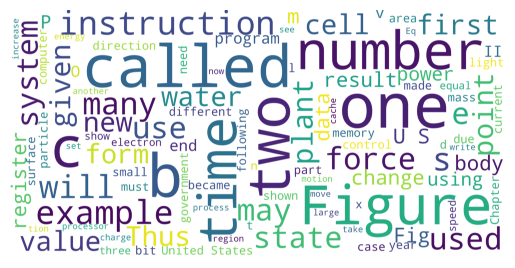

In [243]:
word_cloud_text = ''.join([t[0] for t in texts])
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Pre-process data

In [198]:
##To lower case
#textA = text.lower()

In [199]:
stemmer = nltk.stem.SnowballStemmer('english')

#print("Snowball Stemmer")
#print(stemmer.stem("trouble"))
#print(stemmer.stem("troubling"))
#print(stemmer.stem("troubled"))

In [200]:
#Extract tokens
def tokenize(all_texts):
    all_tokens = []
    for text, label in all_texts:
        tokens = {}
        #Remove non-letter (and not-dot) characters 
        textB = re.sub('[^A-Za-z\.]+',' ',text)
        #Get tokens and their frequency
        text_list = nltk.word_tokenize(textB.lower())
        #Stemming words
        stm_text = [stemmer.stem(w) for w in text_list]
        #Get tokens and frequency
        for word in stm_text:
            tokens[word] = tokens.get(word,0) + 1
        all_tokens.append((tokens, label))
    return all_tokens

In [201]:
#Get the feature frequency dictionary + label for each text
data_points = tokenize(texts)
len(data_points)

3142

In [202]:
#Get the complete frequency dictionary of features
features = {}
for data, label in data_points:
    for word in data:
        features[word] = features.get(word,0) + data[word]
len(features)

31574

In [203]:
#Make a list of noise words, i.e. stop words, too frequent and too rare words 
noise_words = []
eng_stop_words = nltk.corpus.stopwords.words('english')
noise_words.extend(eng_stop_words)

one_percentile = int(len(features)*0.01)
nn_percentile = len(features) - one_percentile
for word in features:
    if features[word] < one_percentile or features[word] > nn_percentile:
        noise_words.append(word)
len(noise_words)

31158

In [204]:
#noise_words

In [205]:
#Remove noise words from the feature list
for word in noise_words:
    if word in features:
        features.pop(word)
len(features)

508

In [206]:
#Remove noise words from the data and add missing features
for word in noise_words:
    for data, label in data_points:
        if word in data:
            data.pop(word)
for data, label in data_points:
    for word in features:
        data[word] = data.get(word,0)

In [208]:
#Order the dictionaries alphabetically
#list(features.items())
features = OrderedDict(sorted(list(features.items()), key=lambda x: x[0]))
count = 0
for data, label in data_points:
    #print(data_points[count])
    data_points[count] = (OrderedDict(sorted(list(data.items()), key=lambda x: x[0])), label)
    count += 1

In [209]:
data_points[0]

(OrderedDict([('a.', 0),
              ('abov', 0),
              ('acceler', 0),
              ('access', 0),
              ('account', 0),
              ('acid', 0),
              ('across', 0),
              ('act', 0),
              ('activ', 0),
              ('ad', 0),
              ('add', 0),
              ('addit', 0),
              ('address', 0),
              ('air', 0),
              ('al', 0),
              ('allot', 0),
              ('allow', 1),
              ('along', 0),
              ('also', 0),
              ('although', 0),
              ('alu', 0),
              ('alway', 2),
              ('american', 0),
              ('among', 0),
              ('amount', 0),
              ('angl', 0),
              ('ani', 0),
              ('anim', 0),
              ('anoth', 1),
              ('answer', 0),
              ('appli', 0),
              ('applic', 1),
              ('area', 0),
              ('around', 0),
              ('assembl', 0),
              ('associ', 

In [153]:
#features['l']

1502

# Train a naive Bayes model

In [221]:
#Separate data and labels
X = []
y = []
for data, label in data_points:
    X.append(list(data.values()))
    y.append(label)
X = np.asarray(X)
y = np.asarray(y)
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [225]:
for label in labels:
    print("{0}: {1:.3f}, ".format(label,np.count_nonzero(y==label)/len(y)),end='')
print("\nTrain:")
for label in labels:
    print("{0}: {1:.3f}, ".format(label,np.count_nonzero(y_train==label)/len(y_train)),end='')
print("\nTest:")
for label in labels:
    print("{0}: {1:.3f}, ".format(label,np.count_nonzero(y_test==label)/len(y_test)),end='')

csc: 0.204, his: 0.159, mat: 0.068, acc: 0.090, bio: 0.202, geo: 0.031, phy: 0.245, 
Train:
csc: 0.205, his: 0.159, mat: 0.068, acc: 0.090, bio: 0.202, geo: 0.031, phy: 0.245, 
Test:
csc: 0.203, his: 0.159, mat: 0.068, acc: 0.091, bio: 0.202, geo: 0.032, phy: 0.245, 

In [227]:
#Model
gnb = GaussianNB()
model = gnb.fit(X_train,y_train)

In [236]:
y_pred = model.predict(X_train)
print("Accuracy on the training set = {0:.3f}".format(accuracy_score(y_train, y_pred)))
#print("Number of mislabeled points on the train set out of a total {0} points : {1}".format(X_train.shape[0], (y_train != y_pred).sum()))

Accuracy on the training set = 0.967


In [237]:
y_pred = model.predict(X_test)
print("Accuracy on the test set = {0:.3f}".format(accuracy_score(y_test, y_pred)))
#print("Number of mislabeled points on the test set out of a total {0} points : {1}".format(X_test.shape[0], (y_test != y_pred).sum()))

Accuracy on the test set = 0.919
